In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
import base64
from multiprocessing.managers import BaseManager
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
import io
from matplotlib import animation, rc 
import networkx as nx
import folium
import folium.plugins
from IPython.core.display import display, HTML
import codecs
from subprocess import check_output


In [4]:
terror_csv = pd.read_csv(r"C:\Users\ofaru\Desktop\GitHub\World_Terrorism_Analysis\gtd_data.csv",encoding="ISO-8859-1") 

terror_csv.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country', 'city':'City', 'latitude':'Latitude', 'longitude':'Longitude', 'attacktype1_txt':'AttackType', 'nkill':'Death', 'nwound':'Injured', 'gname':'Attacker','targtype1_txt':'TargetType','weaptype1_txt':'WeaponType', 'weapsubtype1_txt':'WeaponSubType'},inplace=True)
terror_csv=terror_csv[["Year","Month","Day","Country","City","Latitude","Longitude","AttackType","Death","Injured","Attacker","TargetType","WeaponType","WeaponSubType"]]


<h1>Exploratory Data Analysis</h1>

In [5]:
terror_csv.head()

Year  Month  Day             Country           City   Latitude   Longitude  \
0  1970      7    2  Dominican Republic  Santo Domingo  18.456792  -69.951164   
1  1970      0    0              Mexico    Mexico city  19.371887  -99.086624   
2  1970      1    0         Philippines        Unknown  15.478598  120.599741   
3  1970      1    0              Greece         Athens  37.997490   23.762728   
4  1970      1    0               Japan        Fukouka  33.580412  130.396361   

                       AttackType  Death  Injured  \
0                   Assassination    1.0      0.0   
1     Hostage Taking (Kidnapping)    0.0      0.0   
2                   Assassination    1.0      0.0   
3               Bombing/Explosion    NaN      NaN   
4  Facility/Infrastructure Attack    NaN      NaN   

                             Attacker                   TargetType  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

   WeaponType           WeaponSubType  
0     Unknown                     NaN  
1     Unknown                     NaN  
2     Unknown                     NaN  
3  Explosives  Unknown Explosive Type  
4  Incendiary                     NaN

In [6]:
terror_csv.shape

(181691, 14)

In [7]:
terror_csv.describe()

Year          Month            Day       Latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          Longitude          Death        Injured  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

In [8]:
terror_csv.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
City               434
Latitude          4556
Longitude         4557
AttackType           0
Death            10313
Injured          16311
Attacker             0
TargetType           0
WeaponType           0
WeaponSubType    20768
dtype: int64

<h2>Basic Analysis</h2>

In [9]:
print("Known Count of Deaths in Terrorist Attacks:", terror_csv["Death"].value_counts()[0], "\n")

print("Country With The Highest Terrorist Attacks:", terror_csv["Country"].value_counts().index[0], "\n")

print("Most deaths in an attack:\n",terror_csv.loc[terror_csv['Death'].idxmax()], "\n")

Known Count of Deaths in Terrorist Attacks: 88149 

Country With The Highest Terrorist Attacks: Iraq 

Most deaths in an attack:
 Year                                                    2014
Month                                                      6
Day                                                       12
Country                                                 Iraq
City                                                  Tikrit
Latitude                                           34.621521
Longitude                                          43.668377
AttackType                       Hostage Taking (Kidnapping)
Death                                                 1570.0
Injured                                                  NaN
Attacker         Islamic State of Iraq and the Levant (ISIL)
TargetType                                          Military
WeaponType                                          Firearms
WeaponSubType                               Unknown Gun Type
Name: 133518, dt

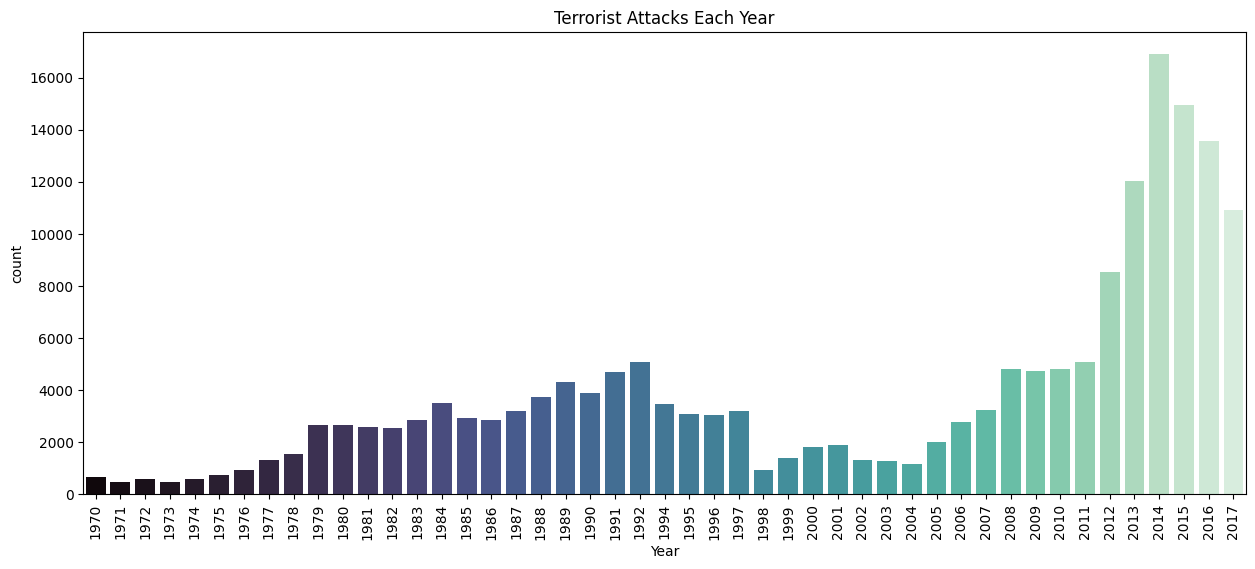

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(data=terror_csv, x="Year", palette="mako")
plt.xticks(rotation=90)
plt.title('Terrorist Attacks Each Year')
plt.show()

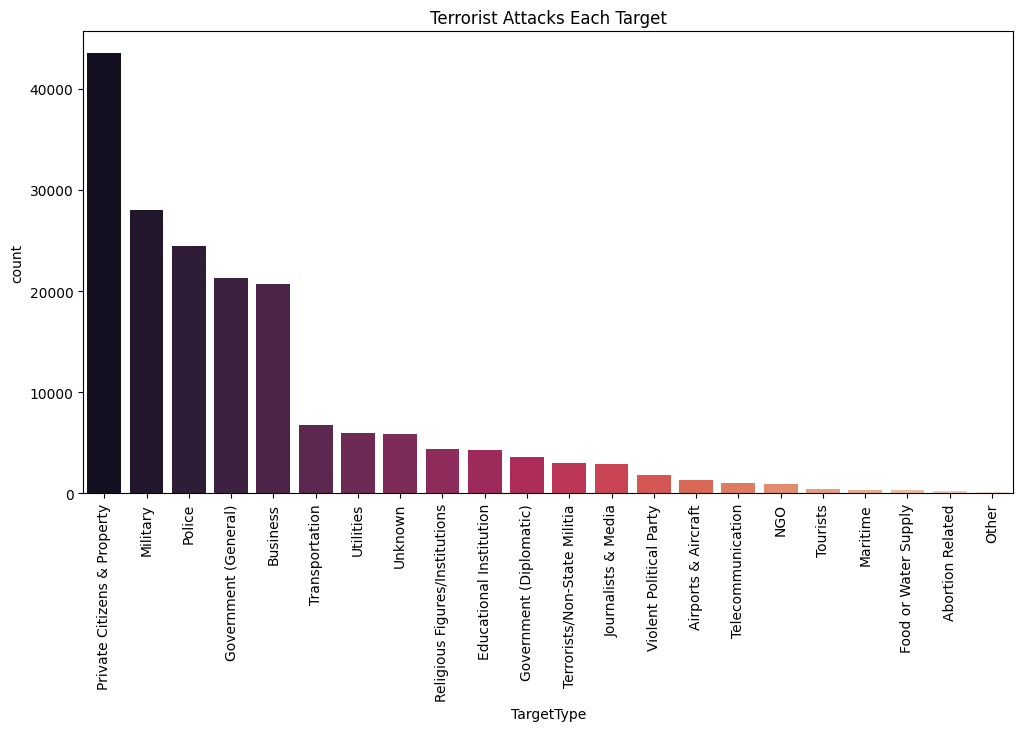

In [11]:
plt.subplots(figsize=(12,6))
sns.countplot(data=terror_csv, x="TargetType", order=terror_csv["TargetType"].value_counts().index, palette="rocket")
plt.xticks(rotation=90)
plt.title('Terrorist Attacks Each Target')
plt.show()

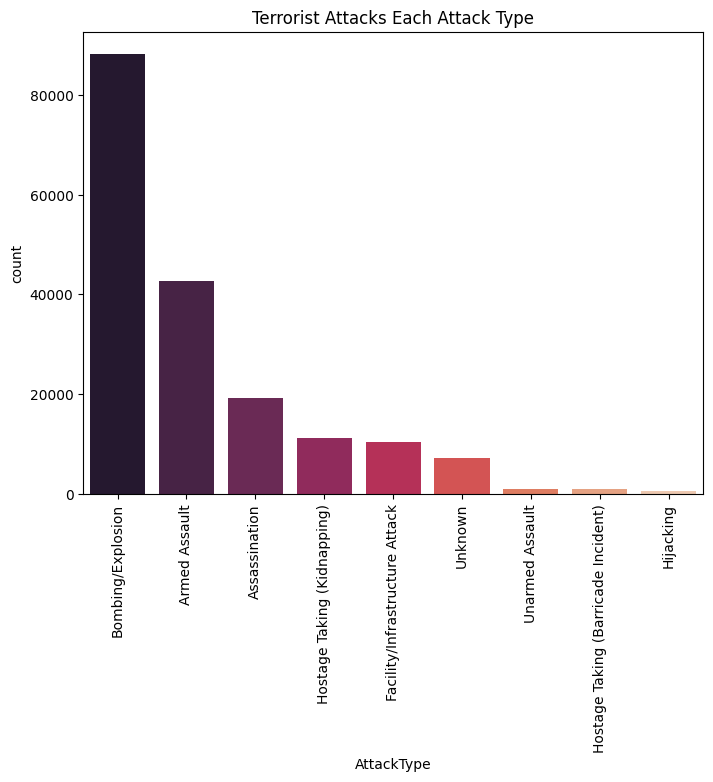

In [12]:
plt.subplots(figsize=(8,6))
sns.countplot(data=terror_csv, x="AttackType", order=terror_csv["AttackType"].value_counts().index, palette="rocket")
plt.xticks(rotation=90)
plt.title('Terrorist Attacks Each Attack Type')
plt.show()

In [23]:
plt.subplots(figsize=(10,6))
sns.barplot(x = terror_csv["Country"].value_counts()[:10].index,y= terror_csv["Country"].value_counts()[:10].values, palette="rocket")
plt.xticks(rotation=90)
plt.title('Top Affected Countries')
plt.show()

In [36]:
plt.subplots(figsize=(8,6))
sns.barplot(x = terror_csv["Attacker"].value_counts()[1:11].values, y= terror_csv["Attacker"].value_counts()[1:11].index , palette="rocket")
plt.title('Terrorist Groups with the Most Attacks')
plt.show()

In [ ]:
def color_point(x):
    if x>=30:
        color='red'
    elif ((x>0 and x<30)):
        color='blue'
    else:
        color='green'
    return color  
    
def point_size(x):
    if (x>30 and x<100):
        size=2
    elif (x>=100 and x<500):
        size=8
    elif x>=500:
        size=16
    else:
        size=0.5
    return size   

terror_turkey=terror_csv[terror_csv["Country"]=="Turkey"]
terror_turkey_fol=terror_turkey.copy()
terror_turkey_fol.dropna(subset=["Latitude","Longitude"],inplace=True)
location_tr=terror_turkey_fol[["Latitude","Longitude"]][:5000]
city_tr=terror_turkey_fol["City"][:5000]
Death_tr=terror_turkey_fol["Death"][:5000]
Injured_tr=terror_turkey_fol["Injured"][:5000]
target_tr=terror_turkey_fol["TargetType"][:5000]

map1 = folium.Map(location=[39.1667, 35.6667],tiles='CartoDB dark_matter',zoom_start=6.4)
for point in location_tr.index:
    folium.CircleMarker(list(location_tr.loc[point].values),popup='<b>City: </b>'+str(city_tr[point])+'<br><b>Killed: </b>'+str(Death_tr[point])+'<br><b>Injured: </b>'+str(Injured_tr[point])+'<br><b>Target: </b>'+str(target_tr[point]),radius=point_size(Death_tr[point]),color=color_point(Death_tr[point]),fill_color=color_point(Death_tr[point])).add_to(map1)

map1

MovieWriter imagemagick unavailable; using Pillow instead.



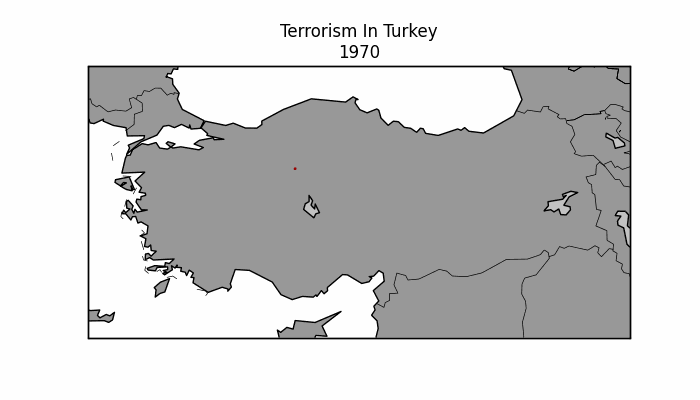

In [ ]:
fig, ax = plt.subplots(figsize = (7,4))
def animate(Year):
    ax.clear()
    ax.set_title('Terrorism In Turkey\n'+ str(Year))
    map2 = Basemap(projection='lcc',resolution='l' ,width=1800000, height=900000 ,lat_0=38.9637, lon_0=35.2433)
    lat_gif=list(terror_turkey[terror_turkey['Year']==Year].Latitude)
    long_gif=list(terror_turkey[terror_turkey['Year']==Year].Longitude)
    x_gif,y_gif=map2(long_gif,lat_gif)
    map2.scatter(x_gif, y_gif,s=[Death+Injured for Death,Injured in zip(terror_turkey[terror_turkey['Year']==Year].Death,terror_turkey[terror_turkey['Year']==Year].Injured)],color = 'r')
    map2.drawcoastlines()
    map2.drawcountries()
    map2.fillcontinents(color='Black',lake_color='white', zorder = 1,alpha=0.4)
    map2.drawmapboundary()
ani = animation.FuncAnimation(fig,animate, list(terror_turkey.Year.unique()), interval = 1500) 

ani.save('animation_tr.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation_tr.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
def animate(Year):
    ax.clear()
    ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year:' +str(Year))
    map3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat3=list(terror_csv[terror_csv['Year']==Year].Latitude)
    long3=list(terror_csv[terror_csv['Year']==Year].Longitude)
    x3,y3=map3(long3,lat3)
    map3.scatter(x3, y3,s=[(Death+Injured)*0.1 for Death,Injured in zip(terror_csv[terror_csv['Year']==Year].Death,terror_csv[terror_csv['Year']==Year].Injured)],color = 'r')
    map3.drawcoastlines()
    map3.drawcountries()
    map3.fillcontinents(color='Black',lake_color='white', zorder = 1,alpha=0.4)
    map3.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(terror_csv.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

MovieWriter imagemagick unavailable; using Pillow instead.
